*Unit 4, Sprint 2, Module 2*

---

# Train (Prepare)
__*Neural Network Foundations*__

## Learning Objectives
* <a href="#p1">Part 1</a>: Student should be able to explain the intuition behind backpropagation and gradient descent
* <a href="#p2">Part 2</a>: Student should be able to discuss the importance of the batch size hyperparameter
* <a href="#p3">Part 3</a>: Student should be able to discuss the importance of the learning rate hyperparameter

## Summary of Module 1

In Module 1, we learned about Neural Networks and related concepts: Neurons, Weights, Activation Functions, and Layers (input, output, & hidden). Today, we will reinforce our understanding, and learn how a neural network is trained. **Feed-forward neural networks**, such as multi-layer perceptrons (MLPs), are almost always trained using some variation of **gradient descent** where gradients has been calculated by **back-propagation**.

  <center><img src="https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-2-Neural-Networks/main/module1-Architect/IMG_0167.jpeg" width=400></center>

- There are three kinds of layers: **input**, **hidden**, and **output**
- Hiddent and output layers are made up of individual neurons (aka activation units) which have a corresponding weight and bias.
- Information is passed from layer to layer through a network by:
 - Taking in inputs from the training data (or previous layer)
 - Multiplying each input by its corresponding weight (represented by arrows) and adding these products to form a weighted sum
 - Adding a bias (also represented by arrows)
 - Activating this weighted sum plus the bias term by "squishifying" it with a sigmoid or some other activation function <br>
 For a `perceptron` with three inputs and a sigmoid activation function, the output is calculated as follows: <br><br>
\begin{align}
 y = \text{sigmoid} \left(weight_{1}\times input_{1} + weight_{2} \times input_{2} + weight_{3} \times input_{3} + bias\right)
\end{align} <br><br>
 - This "activated" neuron output $y$ is the signal that gets passed into the next layer of the network
 - the "activated" neuron output of the output layer is the prediction
 

## Training a Neural Network for Classification: *Formal Summary*

1. Choose a network architecture
   - Number of input units = Number of features
   - Number of output units = Number of Classes (or categories of expected targets)
   - Select the number of hidden layers and the number of neurons within each hidden layer
   - set the activation functions for each neuron
2. Randomly initialize all the weights and biases
3. Forward propagate the weights and biases through the network to compute the output predictions $\hat y$
4. Given the output predictions  $\hat y$ and the true targets  $y$, compute the cost function $J(\theta)$, where $\theta$ is the set of values of all the weights and biases in the network.
5. Perform **back-propagation**, which means computing partial derivatives (gradients) of the cost function with respect to the each of the weights and biases $\frac{\partial}{\partial\theta}{J(\theta)}$
6. Using the method of **gradient descent** (or other advanced optimizer), adjust the weights and biases so as to decrease the cost function $J(\theta)$.
7. Repeat steps 3 - 6 until the cost function is 'minimized' or some other stopping criteria is met. One pass over steps 3 - 6 is called an iteration.

### Highly recommended: Check out this [Neural Networks mini-course from 3Blue1Brown](https://www.3blue1brown.com/topics/neural-networks)<br>
 



------
# 1. Backpropagation & Gradient Descent (Learn)
<a id="p1"></a>

## Overview

Backpropagation is short for ["Backwards Propagation of errors"](https://en.wikipedia.org/wiki/Backpropagation) and refers to a specific algorithm using calculus to update the weights and biases in a neural network in reverse order, at the end of each training epoch. Our purpose today is to demonstrate the backpropagation algorithm on a simple Feedforward Neural Network and in so doing help you get a grasp on the main process. If you want to understand all of the underlying calculus of how the gradients are calculated then you'll need to dive into it yourself, watch [Backpropagation calculus ](https://www.youtube.com/watch?v=tIeHLnjs5U8) from 3Blue1Brown. Also highly recommended is this Welch Labs series [Neural Networks Demystified](https://www.youtube.com/watch?v=bxe2T-V8XRs) if you want a rapid yet orderly walk through of the main intuition and math behind the backpropagation algorithm. 

## 1.1 What is a Gradient?

> In vector calculus, the gradient is a multi-variable generalization of the derivative. 

The gradients that we will deal with today will be vector representations of the derivative of the activation function. 

### 1.1.1 Review: Slope of a line 

![](https://www.mathwarehouse.com/algebra/linear_equation/images/slope-of-a-line/slope-formula-all_no_highlight.png)

### 1.1.2 Review: A basic derivative 

![](https://ginsyblog.files.wordpress.com/2017/02/derivativelimitdef.gif)

### 1.1.3 Gradients are multi-dimensional derivatives

Each partial derivative can be considered as the component of a vector that lies on the axis of the associated parameter.  <br>
Formally, the gradient is the vector sum of these partial derivative vectors.

*The gradient of a function at a given point contains information about the magnitude <br>
and direction of the sensitivity of the function to change in every parameter.*

##1.2. Gradient Descent Formula for updating neural network parameters

Given the values of the current parameters (weights and biases), this formula prescribes how to update them in order to drive down the cost function, given their current values:

$$ \huge{\theta_j = \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}}$$


In this formula, 
- $\Large{\theta_j}$ refers to the vector of weights and biases for the $jth$ data point<br><br>
- $\Large{\theta}$ refers to the combined set of weights and biases of all the data points<br><br>
- $\Large{J(\theta)}$ represents the cost function, which is a measure of the error between the predicted target values and the true target values<br><br>
- $\Large{\alpha}$ is the *learning rate*, a positive scalar hyper-parameter<br><br>
- $\Large{\frac{\partial J(\theta)}{\partial \theta_j}}$ are the partial derivatives of the cost function, which measure its sensitivity to changes in the parameters $\Large{\theta_j}$<br><br>


More sophisticated versions of gradient descent are discussed in the excellent article [**An overview of gradient descent optimization algorithms**](https://ruder.io/optimizing-gradient-descent/) by Sebastian Ruder.


These versions all build on the Gradient Descent Formula presented above, so it's best to understand this before moving on to more sophisticated versions. <br>


### 1.2.1 Geometry of Gradient Descent 

![](https://i.stack.imgur.com/yk1mk.png)

### 1.2.2 Convex vs. Non-Convex Loss Functions

Loss curves won't always have a single minimum point for gradient descent to converge towards. Sometimes there are multiple minimums. 

**Global Minimum:** The absolute minimum location of a curve (or surface). 

**Local Minimum:** The local minimum location of a curve (or surface). 


### In 3-Dimensions 
In Calculus, those ambiguous points that take on the form of both local minima and local maxima are known as [**saddle points**](https://en.wikipedia.org/wiki/Saddle_point). It's not necessary to dive into the mathematics, the key take away is that non-convex error curves (and surfaces) have this global/local minimum issue. 

![](https://www.oreilly.com/radar/wp-content/uploads/sites/3/2019/06/convex-non-convex-9c8cb9320d4b0392c5f67004e8832e85.jpg)


**Take Away:** Sometimes the gradient descent algorithm converges but is actually trapped in a local minimum. 

There are at least 2 possible solutions to this problem: 

1) Try different approaches to randomly initalizing the model weights
For this check out [Keras's docs on Weight Initializers](https://keras.io/api/layers/initializers/). Treat these weight initializers as just another hyper-parameter to include in your gridsearch. It's a good idea to get into the practice of including weight initializers in your gridsearches! 


2) Try non-gradient descent optimizers such as [Particle Swarm](https://en.wikipedia.org/wiki/Particle_swarm_optimization) or [Genetic Algorithms](https://en.wikipedia.org/wiki/Genetic_algorithm). Feel free to read up on these approaches but know that **you are not expected to know these approaches** and they are outside the scope of this course. 

------
## 1.3 Let's see how to implement Gradient Descent in Keras for a simple toy problem! (Follow Along)

In this section, we will again build a simple neural network using base TensorFlow. <br>
We'll train a __Feed Forward Neural Network__ to predict targets,<br> using the method of __Gradient Descent__ to adjust the neural network parameters.<br><br> This is the process of __Back-propagation__!

### 1.3.1 Generate synthetic (fake) data for a simple linear regression problem involving a single neuron signal <br>
$y = \textbf{w} \cdot \textbf{x} + b + \text{noise}$

In [1]:
# plotting 
import matplotlib.pyplot as plt

# dataset import
from tensorflow.keras.datasets import mnist

# tensorflow imports for building 
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
%matplotlib inline

In [2]:
# Generate samples of a Linear Regression data model
# y     =      w  *  x    +  b     + noise

### BEGIN SOLUTION
# Specify the model parameters: slope(weight) and intercept (bias)
w_true = 3.5
b_true = 50.0
# Specify how many examples we want to generate
n_examples = 1000

# linear regression assumes normally distributed data, 
#    so we'll draw our input values (x) and noise values from Gaussian distributions 
x = tf.random.normal(shape=[n_examples])
noise = tf.random.normal(shape=[n_examples])

# Generate samples from the Linear Regression data model
# y     =      w  *  x    +  b     + noise
y_true = w_true * x + b_true + noise
### END SOLUTION

### 1.3.2 Loss Function
The Mean Squared Error (MSE), is an appropriate loss function for a regression problem. We are trying to predict a continuous target.

$$\huge{\text{MSE} = \frac{1}{N}\sum_{i=1}^{N} (y_i-\hat{y}_i)^2}$$

In [3]:
def loss(target_y, predicted_y, model, reg_strength=0.0):
    """
    Implements Mean Square Error (MSE) as the loss function
    """
    return tf.reduce_mean(tf.square(target_y - predicted_y))

### 1.3.3 Neural Network Architecture
Lets create a Neural Network class called `Model` to feed forward the input to a neural network composed of a single linear layer, with no activation function. Note: This is essentially a linear regression model whose coefficients are trained by gradient descent. In practice, gradient descent works on much more complex functions like the multi-layer networks we constructed in Module 1.

In [5]:
class Model(object):

    def __init__(self):
        self.w = tf.Variable(8.0)
        self.b = tf.Variable(40.0)

    def __call__(self, x):
        # returns w*x + b 
        return self.w * x + self.b

# Instantiate the Model() class
model = Model()

# test the Model() class
#    with parameters w = 8 and b = 40, our model is  y(x) = w*x + b = 8
#    with input of x = 3, we expect y = 8*3 + 40 = 64

assert model(3.0).numpy() == 64.0

### 1.3.4 Prediction with Initial Weights
The weights in our model were initialized randomly, so of course our neural network's initial predictions are way off!

Current loss: 121.579933


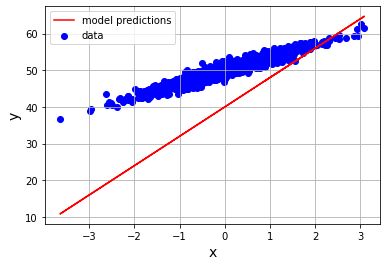

In [6]:
inputs = x
outputs = y_true
predictions = model(inputs)
plt.scatter(inputs, outputs, c='b', label = "data")
plt.plot(inputs, predictions, c='r', label = "model predictions")
plt.xlabel('x',FontSize=14)
plt.ylabel('y',FontSize=14)
plt.legend()
plt.grid();

print('Current loss: %1.6f' % loss(predictions, outputs, model).numpy())

### 1.3.5 Back-propagation
Means iteratively updating the weights and bias based on the gradients of the loss function.<br>
We'll write a helper function to train a model using Keras!


In [7]:
 # this train function updates w and b using partial derivative of the loss function w.r.t. w and b
 def train(model, inputs, outputs, learning_rate):
    with tf.GradientTape() as tape: 
                  
      # calculate the loss function value from our model's predictions
      current_loss = loss(outputs, model(inputs), model)
          
      # calculate dw and db, the gradients of the loss function with respect to W and b 
      dw, db = tape.gradient(current_loss, [model.w, model.b]) 
      
      # update the value of W by subtracting (learning rate) * (gradient of the loss function wrt W) from its current value
      model.w.assign_sub(learning_rate * dw)
      
      # update the value of b by subtracting (learning rate) * (gradient of the loss function wrt b) from its current value
      model.b.assign_sub(learning_rate * db)

### 1.3.6 Train the Network
At each epoch, we'll print the values of the updated parameters and the loss function

In [8]:
model = Model()

# Store parameter history
ws, bs = [], []
current_loss = []
epochs = range(50)

for epoch in epochs:

    # forward propagate the current parameters through the network to predict targets
    y_hat =  model(inputs)

    # compute the loss function by comparing target predictions to the true targets
    current_loss.append(loss(outputs, y_hat, model))

    # update the parameters (weight and bias) based on gradient descent
    train(model, inputs, outputs, learning_rate=0.1)

    # store the updated values of weight and bias
    ws.append(model.w.numpy())
    bs.append(model.b.numpy())

    print('Epoch %2d: w=%1.2f b=%1.2f loss=%2.5f' % (epoch, ws[-1], bs[-1], current_loss[-1]))



Epoch  0: w=7.11 b=42.01 loss=121.57993
Epoch  1: w=6.39 b=43.61 loss=78.13313
Epoch  2: w=5.82 b=44.90 loss=50.34162
Epoch  3: w=5.36 b=45.92 loss=32.56432
Epoch  4: w=5.00 b=46.75 loss=21.19275
Epoch  5: w=4.70 b=47.40 loss=13.91873
Epoch  6: w=4.47 b=47.93 loss=9.26577
Epoch  7: w=4.28 b=48.35 loss=6.28940
Epoch  8: w=4.13 b=48.68 loss=4.38550
Epoch  9: w=4.01 b=48.95 loss=3.16764
Epoch 10: w=3.91 b=49.16 loss=2.38861
Epoch 11: w=3.84 b=49.34 loss=1.89029
Epoch 12: w=3.77 b=49.47 loss=1.57152
Epoch 13: w=3.72 b=49.58 loss=1.36761
Epoch 14: w=3.68 b=49.67 loss=1.23718
Epoch 15: w=3.65 b=49.74 loss=1.15374
Epoch 16: w=3.63 b=49.80 loss=1.10037
Epoch 17: w=3.61 b=49.84 loss=1.06623
Epoch 18: w=3.59 b=49.88 loss=1.04439
Epoch 19: w=3.58 b=49.91 loss=1.03042
Epoch 20: w=3.57 b=49.93 loss=1.02149
Epoch 21: w=3.56 b=49.95 loss=1.01577
Epoch 22: w=3.55 b=49.96 loss=1.01212
Epoch 23: w=3.55 b=49.97 loss=1.00978
Epoch 24: w=3.54 b=49.98 loss=1.00828
Epoch 25: w=3.54 b=49.99 loss=1.00732
Epoch

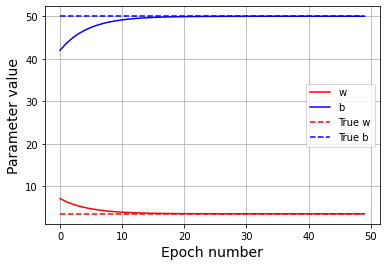

In [9]:
plt.plot(epochs, ws, 'r', epochs, bs, 'b')
plt.plot([w_true] * len(epochs), 'r--',
         [b_true] * len(epochs), 'b--')
plt.xlabel('Epoch number',FontSize=14)
plt.ylabel('Parameter value',FontSize=14)
plt.legend(['w', 'b', 'True w', 'True b'])
plt.grid()

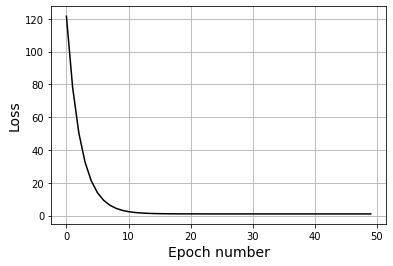

In [10]:
plt.plot(epochs, current_loss, 'k')
plt.xlabel('Epoch number',FontSize=14)
plt.ylabel('Loss',FontSize=14)
plt.grid()

Current loss: 1.005623


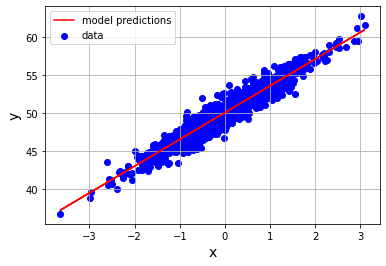

In [11]:
plt.scatter(inputs, outputs, c='b', label = "data")
plt.plot(inputs, model(inputs),c='r',label = "model predictions")
plt.legend()
plt.xlabel('x',FontSize=14)
plt.ylabel('y',FontSize=14)
plt.grid()

print('Current loss: %1.6f'% current_loss[-1])

### Nice job! Our model closely fits the data. 
### Congratulations! <br>
You've just learned how to train a neural network using gradient descent and back-propagation with Keras!

## Challenge

In the module project, you will be asked to explain the logic of back-propagation and gradient descent.

## Investigate the effects of the `batch_size` and `learning_rate` hyperparameters.

In parts 2 and 3, we'll return to modeling the MNIST handwritten digit data set. <br>
Although we'll adjust `batch_size` and `learning_rate` separately, they are in fact related. <br>
Larger `batch_size` gives more accurate parameter updates, so we can confidently move toward the minimum of the loss function with larger steps, i.e. we can use larger values of `learning_rate`. Conversely, smaller batch sizes give "noisier" updates, so we should take smaller steps, i.e. use smaller values of `learning_rate`. 



# 2. Effect of the Batch Size Hyperparameter on Training a Neural Network (Learn)

## 2.1 Overview

### 2.1.1 Stochastic Gradient Descent

Stochastic Gradient Descent (SGD) calculates an approximation of the gradient over the entire dataset from the predictions of a **single** randomly chosen sample. 

Why use a single sample instead of all of the samples (a batch), or a random subset of the samples (a minibatch)?

Because calculating the gradient over the entire dataset (or a subset) is extremely expensive computationally compared to using a single sample.

So parameter updates in SGD are super-fast. What's the tradeoff? Can't get something for nothing!<br>
The tradeoff is that SGD produces a noisy parameter update, because we are only using a small amount of information (a single sample) to compute the update!

**Takeaway**: SGD computes *rapid* but *noisy* parameter updates!

### 2.1.2 Minibatch Gradient Descent
In minibatch Gradient Descent, the parameters are updated based on a batch of data points. Batch size is the number of data points our model uses to update the parameters and predict target values. A batch is a randomly selected subset of an epoch. All observations are eventually used when processing an epoch.

* Smaller Batch = Slower Run Time, but potentially better generalization accuracy (due to noisier updates helping against overfitting!)
* Default Batch = Balance between speed and generalization accuracy
* Large Batch = Faster run time, but potentially worse generalization accuracy due to overfitting

### 2.1.3 Batch Gradient Descent
Another way to do Gradient Descent is to use all the data to compute each update, so that the parameters get updated only every epoch. But this is often problematic, because the whole dataset would have to fit in memory, and dataset can be huge.

## 2.2 Baseline Model with MNIST data

In [12]:
# load data

# normalize data

### BEGIN SOLUTION
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# normalize data 
max_pixel_value = 255
X_train = X_train / max_pixel_value
X_test = X_test / max_pixel_value

X_train = X_train.reshape((60000, 784))
X_test = X_test.reshape((10000, 784))
### END SOLUTION

11501568/11490434 [==============================] - 0s 0us/step


### 2.2.1 Normalizing the data can help your model learn faster

If your dataset has values ranging across multiple orders of magnitude (i.e. $10^1,~~10^2,~~10^3,~~10^4$), then gradient descent will update the weights and biases in grossly uneven proportions.<br> 

**Normalizing** the data, i.e shifting and scaling the values to lie within the unit interval $[0,1]$ ensures that all weight and bias updates are on the same scale, which can lead to quicker convergence. 

![](https://quicktomaster.com/wp-content/uploads/2020/08/contour_plot.png)

There's more to be said about Normalization and Gradient Descent <br>
If you are interested in going deeper, we highly recommend this well written article [Normalizing your data](https://www.jeremyjordan.me/batch-normalization/) in which Jeremy Jordan explores the impact of normalization on Gradient Descent in greater detail.

### 2.2.2 Helper function to build our neural network model
Since this is a classification problem with 10 classes and the target values are integers the [appropriate loss function](https://stats.stackexchange.com/questions/326065/cross-entropy-vs-sparse-cross-entropy-when-to-use-one-over-the-other) to use in our model is `sparse_categorical_crossentropy`.

In [13]:
# write a function called create_model that accepts a learning rate alpha for SGD as an input parameter 
# it should return a complied, 2 hidden layer neural net that uses SGD as the optimizer 
# Import SGD as discussed here: https://keras.io/api/optimizers/sgd/



# create create_model
def create_model(lr=.01):
    """
    Parameters
    ----------
    lr: float
        Learning rate parameter used for Stocastic Gradient Descent 
        
    Returns
    -------
    model: keras object 
        A complied keras model 
    """
### BEGIN SOLUTION
    opt = SGD(learning_rate=lr)

    # build a model by passing a list of layers to Sequential()
    model = Sequential([
          # hidden layer 1 
          Dense(1, activation='relu', input_dim=784),
          # hidden layer 2 
          Dense(32, activation='relu'),
          # output layer 
          Dense(10, activation='softmax')

    ])

    model.compile(optimizer=opt, 
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model
### END SOLUTION 

In [14]:
create_model().summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 785       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                64        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 1,179
Trainable params: 1,179
Non-trainable params: 0
_________________________________________________________________


## 2.3 Experiments to gauge the effect of batch size (Follow Along)
Let's run a series of experiments for a default, small, and large batch size.

### 2.3.1 Default Batch Size
Batch Size is 32

In [15]:
%%time
# instantiate a model and fit it with batch size of 32
model = create_model()
bt_default = model.fit(X_train, y_train, batch_size=32, validation_data=(X_test, y_test), epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 2.1542 - accuracy: 0.1724 - val_loss: 1.9636 - val_accuracy: 0.2287
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.9056 - accuracy: 0.2446 - val_loss: 1.8603 - val_accuracy: 0.2611
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.8357 - accuracy: 0.2646 - val_loss: 1.8050 - val_accuracy: 0.2803
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7851 - accuracy: 0.2807 - val_loss: 1.7618 - val_accuracy: 0.2876
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7364 - accuracy: 0.2907 - val_loss: 1.7148 - val_accuracy: 0.2993
CPU times: user 20.6 s, sys: 2.01 s, total: 22.6 s
Wall time: 20.2 s


What's that number 1875? It's the number of batches in the full data set

In [16]:
print(X_train.shape)
print(X_train.shape[0]/32)

(60000, 784)
1875.0


In [ ]:
60000/32

1875.0

### 2.3.2 Small Batch Size
Batch Size is 8

In [17]:
%%time
# instantiate a model and fit it with batch size of 8
#YOUR CODE HERE
bt_small = model.fit(X_train, y_train, batch_size=8, validation_data=(X_test, y_test), epochs=5)

Epoch 1/5
7500/7500 [==============================] - 17s 2ms/step - loss: 1.6879 - accuracy: 0.3016 - val_loss: 1.6520 - val_accuracy: 0.3284
Epoch 2/5
7500/7500 [==============================] - 16s 2ms/step - loss: 1.6493 - accuracy: 0.3195 - val_loss: 1.6228 - val_accuracy: 0.3356
Epoch 3/5
7500/7500 [==============================] - 16s 2ms/step - loss: 1.6263 - accuracy: 0.3452 - val_loss: 1.6091 - val_accuracy: 0.3519
Epoch 4/5
7500/7500 [==============================] - 17s 2ms/step - loss: 1.5986 - accuracy: 0.3712 - val_loss: 1.6124 - val_accuracy: 0.3779
Epoch 5/5
7500/7500 [==============================] - 17s 2ms/step - loss: 1.5618 - accuracy: 0.3863 - val_loss: 1.5485 - val_accuracy: 0.3913
CPU times: user 1min 29s, sys: 7.11 s, total: 1min 36s
Wall time: 1min 23s


### 2.3.3 Large Batch Size
Batch Size is 512

In [18]:
# instantiate a model and fit it with batch size of 512
#YOUR CODE HERE
bt_large = model.fit(X_train, y_train, batch_size=512, validation_data=(X_test, y_test), epochs=5)

Epoch 1/5
118/118 [==============================] - 1s 4ms/step - loss: 1.5214 - accuracy: 0.4108 - val_loss: 1.5192 - val_accuracy: 0.4045
Epoch 2/5
118/118 [==============================] - 0s 4ms/step - loss: 1.5175 - accuracy: 0.4111 - val_loss: 1.5176 - val_accuracy: 0.4077
Epoch 3/5
118/118 [==============================] - 0s 3ms/step - loss: 1.5162 - accuracy: 0.4119 - val_loss: 1.5163 - val_accuracy: 0.4067
Epoch 4/5
118/118 [==============================] - 0s 3ms/step - loss: 1.5151 - accuracy: 0.4126 - val_loss: 1.5156 - val_accuracy: 0.4099
Epoch 5/5
118/118 [==============================] - 0s 4ms/step - loss: 1.5142 - accuracy: 0.4122 - val_loss: 1.5144 - val_accuracy: 0.4083


In [21]:
bt_default.history

{'accuracy': [0.17238333821296692,
  0.24461667239665985,
  0.26460000872612,
  0.28068333864212036,
  0.2906833291053772],
 'loss': [2.1541659832000732,
  1.9055898189544678,
  1.8357499837875366,
  1.7850828170776367,
  1.7363734245300293],
 'val_accuracy': [0.22869999706745148,
  0.26109999418258667,
  0.28029999136924744,
  0.28760001063346863,
  0.2992999851703644],
 'val_loss': [1.963626742362976,
  1.8602591753005981,
  1.8049832582473755,
  1.7618074417114258,
  1.7148324251174927]}

In [22]:
import pandas as pd
dd = pd.DataFrame.from_dict(bt_default.history)

In [23]:
dd

,loss,accuracy,val_loss,val_accuracy
0,2.154166,0.172383,1.963627,0.2287
1,1.905590,0.244617,1.860259,0.2611
2,1.835750,0.264600,1.804983,0.2803
3,1.785083,0.280683,1.761807,0.2876
4,1.736373,0.290683,1.714832,0.2993


### 2.3.4 Visualize Results

In [24]:
import seaborn as sns
import pandas as pd

experiment_dfs = []

for experiment, label in zip([bt_default, bt_small, bt_large], ["32_", "8_", "512_"]):

    df = pd.DataFrame.from_dict(experiment.history)
    df['epoch'] = df.index.values
    df['Batch Size'] = label

    # append to list of experiment data frames
    experiment_dfs.append(df)

df = pd.concat(experiment_dfs,ignore_index=True)
df['Batch Size'] = df['Batch Size'].astype('str')
df

,loss,accuracy,val_loss,val_accuracy,epoch,Batch Size
0,2.154166,0.172383,1.963627,0.2287,0,32_
1,1.905590,0.244617,1.860259,0.2611,1,32_
2,1.835750,0.264600,1.804983,0.2803,2,32_
3,1.785083,0.280683,1.761807,0.2876,3,32_
4,1.736373,0.290683,1.714832,0.2993,4,32_
5,1.687876,0.301650,1.651965,0.3284,0,8_
6,1.649275,0.319500,1.622820,0.3356,1,8_
7,1.626280,0.345183,1.609105,0.3519,2,8_
8,1.598592,0.371183,1.612448,0.3779,3,8_
9,1.561812,0.386283,1.548545,0.3913,4,8_


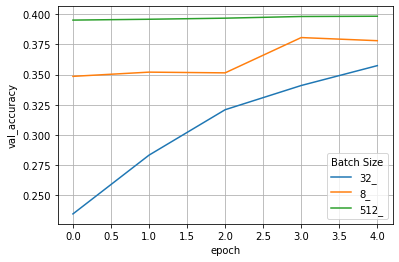

In [ ]:
sns.lineplot(x='epoch', y='val_accuracy', hue='Batch Size', data=df);
plt.grid()

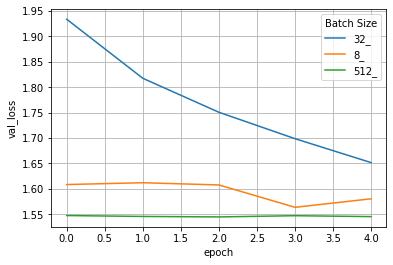

In [ ]:
sns.lineplot(x='epoch', y='val_loss', hue='Batch Size', data=df);
plt.grid()

## Challenge

You will be expected to experiment with batch size on today's assignment.

# 3. The Effect of the Learning Rate Hyperparameter on Neural Network Training (Learn)

![](https://www.jeremyjordan.me/content/images/2018/02/Screen-Shot-2018-02-24-at-11.47.09-AM.png)

## 3.1 Overview

Learning Rate controls the size of the update to our weights that the optimization algorithm makes. VERY IMPORTANT hyperparameter.

* If the learning rate is too high, the model will not find the minimum
* If the learning rate is too low, the model will underfit or take too long to converge
* Goldilocks learning rate is "just right", the model converges rapidly
* Scale of 0-1

## 3.2 Experiments to gauge the effect of learning rate (Follow Along)

Try experiments with same Batch Size = 32 but different Learning Rates:
* High Learning Rate = .75
* Default Learning Rate = .01
* Low Learning Rate = .0001

### 3.2.1 Default Learning Rate

In [25]:
# instantiate a model and fit it with a learning rate value of 0.01
model = create_model(lr=.01)
lr_default = model.fit(X_train, y_train, batch_size=32, validation_data=(X_test, y_test), epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.0427 - accuracy: 0.2214 - val_loss: 1.9277 - val_accuracy: 0.2489
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.8657 - accuracy: 0.2733 - val_loss: 1.7931 - val_accuracy: 0.2993
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7198 - accuracy: 0.3079 - val_loss: 1.6709 - val_accuracy: 0.3015
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6417 - accuracy: 0.3180 - val_loss: 1.6311 - val_accuracy: 0.3110
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6091 - accuracy: 0.3374 - val_loss: 1.5965 - val_accuracy: 0.3528


### 3.2.2 High Learning Rate

In [28]:
# instantiate a model and fit it with a learning rate value of 0.75
model = create_model(lr=0.75)
lr_high = model.fit(X_train, y_train, batch_size=32, validation_data=(X_test, y_test), epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3068 - accuracy: 0.1068 - val_loss: 2.3085 - val_accuracy: 0.1028
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3070 - accuracy: 0.1021 - val_loss: 2.3088 - val_accuracy: 0.1135
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3068 - accuracy: 0.1051 - val_loss: 2.3049 - val_accuracy: 0.0958
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3069 - accuracy: 0.1040 - val_loss: 2.3035 - val_accuracy: 0.1028
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3068 - accuracy: 0.1058 - val_loss: 2.3112 - val_accuracy: 0.0958


### 3.2.3 Low Learning Rate

In [26]:
# instantiate a model and fit it with a learning rate value of 0.0001
model = create_model(lr=0.0001)
lr_low = model.fit(X_train, y_train, batch_size=32, validation_data=(X_test, y_test), epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3006 - accuracy: 0.0613 - val_loss: 2.2973 - val_accuracy: 0.0506
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2947 - accuracy: 0.0612 - val_loss: 2.2915 - val_accuracy: 0.0635
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2891 - accuracy: 0.0821 - val_loss: 2.2858 - val_accuracy: 0.0938
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 2.2833 - accuracy: 0.1059 - val_loss: 2.2797 - val_accuracy: 0.1128
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2771 - accuracy: 0.1441 - val_loss: 2.2730 - val_accuracy: 0.1490


### 3.2.4 Visualize Results

In [29]:
import seaborn as sns
import pandas as pd

experiments = []

for experiment, label in zip([lr_default, lr_low, lr_high], [".01_", ".0001_", ".75_"]):

    df = pd.DataFrame.from_dict(experiment.history)
    df['epoch'] = df.index.values
    df['Learning Rate'] = label

    experiments.append(df)

df = pd.concat(experiments,ignore_index=True)
df['Learning Rate'] = df['Learning Rate'].astype('str')
df

,loss,accuracy,val_loss,val_accuracy,epoch,Learning Rate
0,2.042748,0.221383,1.927688,0.2489,0,.01_
1,1.865727,0.273267,1.793136,0.2993,1,.01_
2,1.719807,0.307933,1.670906,0.3015,2,.01_
3,1.641659,0.318000,1.631062,0.3110,3,.01_
4,1.609124,0.337400,1.596534,0.3528,4,.01_
5,2.300604,0.061267,2.297306,0.0506,0,.0001_
6,2.294688,0.061233,2.291546,0.0635,1,.0001_
7,2.289127,0.082050,2.285793,0.0938,2,.0001_
8,2.283313,0.105900,2.279679,0.1128,3,.0001_
9,2.277057,0.144067,2.273045,0.1490,4,.0001_


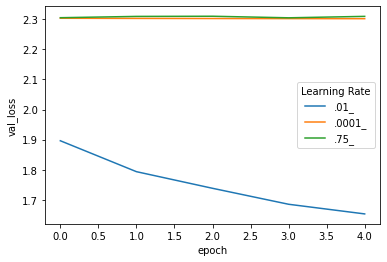

In [ ]:
sns.lineplot(x='epoch', y='val_loss', hue='Learning Rate', data=df);
plt.grid()

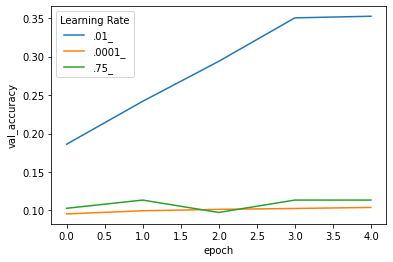

In [ ]:
sns.lineplot(x='epoch', y='val_accuracy', hue='Learning Rate', data=df);
plt.grid()

##3.3 Learning Rate Scheduler Callback
A great way to tune the learning rate is to use a learning rate scheduler, which adjusts the learning rate at each epoch according to a user-supplied "schedule". We'll show how to introduce an exponentially increasing schedule.
The idea is you do a trial run with the scheduler, plot the loss vs. epoch, and choose a good learning rate by inspecting the plot.

Here is a learning rate scheduler that starts the learning rate at 1.e-6 and increases by a factor of ten every 5 epochs. So that over 30 epochs, the learning rate goes from 1.e-6 up to 1.0 

In [31]:
def scheduler(epoch):
    lr = 1e-6 * 10**(epoch/5)
    return lr

# Here is the callback
lr_schedule = tf.keras.callbacks.LearningRateScheduler(scheduler)

Let's try it out!

Epoch 1/30
1875/1875 [==============================] - 3s 2ms/step - loss: 2.2944 - accuracy: 0.1268
Epoch 2/30
1875/1875 [==============================] - 3s 2ms/step - loss: 2.2942 - accuracy: 0.1273
Epoch 3/30
1875/1875 [==============================] - 3s 2ms/step - loss: 2.2939 - accuracy: 0.1278
Epoch 4/30
1875/1875 [==============================] - 3s 2ms/step - loss: 2.2934 - accuracy: 0.1285
Epoch 5/30
1875/1875 [==============================] - 3s 2ms/step - loss: 2.2926 - accuracy: 0.1297
Epoch 6/30
1875/1875 [==============================] - 3s 2ms/step - loss: 2.2914 - accuracy: 0.1315
Epoch 7/30
1875/1875 [==============================] - 3s 2ms/step - loss: 2.2897 - accuracy: 0.1342
Epoch 8/30
1875/1875 [==============================] - 3s 2ms/step - loss: 2.2873 - accuracy: 0.1378
Epoch 9/30
1875/1875 [==============================] - 3s 2ms/step - loss: 2.2838 - accuracy: 0.1427
Epoch 10/30
1875/1875 [==============================] - 3s 2ms/step - loss: 2.278

(1e-06, 0.001, 0.0, 20.0)

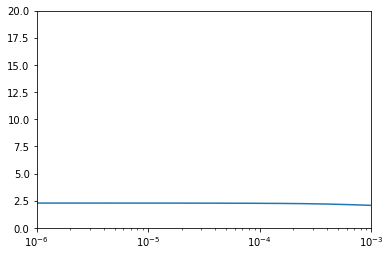

In [32]:
# create the model and fit it, passing in the learning rate scheduler callback that we created
epochs = 30
batch_size = 32
model = create_model()
history = model.fit(X_train, y_train, batch_size=batch_size,callbacks=[lr_schedule] , epochs=epochs)

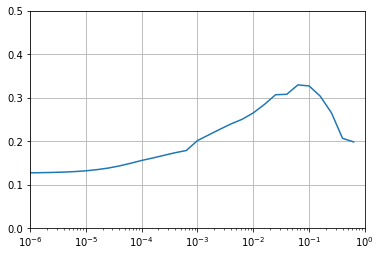

In [38]:
# plot the result
plt.semilogx(history.history["lr"], history.history["accuracy"])
plt.axis([1e-6, 1, 0, 0.5])
plt.grid()

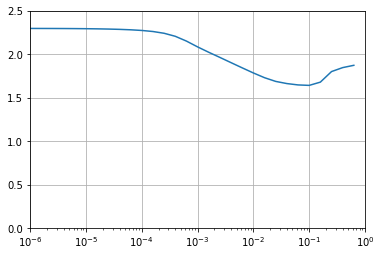

In [40]:
# plot the result
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-6, 1, 0, 2.5])
plt.grid()

## Challenge

You will be expected to experiment with different learning rates today.

---

# 4. Stretch: How do I know if my neural net is overfitting ?

Compare train losses vs. test losses (or use a metric such as `accuracy` instead of `loss`) and look for the gap between the curves. <br>
This is for the results of section 3.2.4<br>


See [How to use Learning Curves to Diagnose Machine Learning Model Performance](https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/) for further details 

In [ ]:
sns.lineplot(x='epoch', y='val_loss', data=df[df['Learning Rate']=='.01_'], label="test_loss")
sns.lineplot(x='epoch', y='loss', data=df[df['Learning Rate']=='.01_'], label="train_loss");

In [ ]:
sns.lineplot(x='epoch', y='val_accuracy', data=df[df['Learning Rate']=='.01_'])
sns.lineplot(x='epoch', y='accuracy', data=df[df['Learning Rate']=='.01_']);